# Welcome to the jupyter notebook for Ro-Vibrational Spectrscopy!
### Created Fall 2022: J. A. DePaolo-Boisvert

In [1]:
# Importing Packages which are like collections of code that groups of people will find useful
# Some packages are widely known and applied while others can be much more niche
import numpy as np #invokes numpy commands with jnp.command()
import jax.numpy as jnp
import scipy as sp
import scipy.constants as cons #constants is a submodule of scipy that we want easy access to
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(title, xs, ys, xlabel, ylabel):
    plt.clf()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    _ = plt.plot(xs, ys)
    plt.show()

In [2]:
#Defining Constants
h = cons.Planck
kb = cons.Boltzmann
c = cons.c
amutokg = 1.66E-27
evtojoule = 1.602176634E-19 #Multiplicative conversions

#Define the diatomic molecule here
mass1 = 1.007825 *amutokg
mass2 = 34.968853 *amutokg
#H=1.007825, D=2.014102, Cl(35)=34.968853, and Cl(37)=36.965903

#Define bond strength (N/m) and temperature (K)
temp = 300
k_force = 481

### 'From Physics we know that the vibrational frequency of a harmonic' oscillator is
$f = \frac{1}{2*\pi}*\sqrt{k/\mu}$

In [3]:
#Reduced Mass
reduced_mass = lambda m1, m2: (m1*m2)/(m1+m2)
#Frequency Function
Freq = lambda k_force, mu: jnp.sqrt(k_force/mu)/(2*cons.pi)
#Obtain Frequency
freq_vib = Freq(k_force, reduced_mass(mass1, mass2))
#Convert Units
freq_vib_wvnm = freq_vib/(cons.c*100)
print(freq_vib, freq_vib_wvnm)

86559720000000.0 2887.3213


#### From Equation 1 of the text
The energy levels of a harmonic oscillator are given by the base frequency and the level number.
$$
E(\nu_o, \nu) = h\nu_0(\nu+1/2)
$$


In [4]:
e_vib_levels = lambda base_freq, level : h*base_freq*(level+0.5)

#Lets say we want to see the frequencies of the first 10 energy levels
#of this oscillator
E_levels = e_vib_levels(freq_vib, jnp.arange(0,10)) #Note that this calls for the frequency in Hz
for entry in E_levels:
    print(entry/(cons.h*cons.c*100))

1443.6609
4330.983
7218.3047
10105.627
12992.949
15880.2705
18767.592
21654.914
24542.234
27429.559


#### From Equation 2 of the text
$$
E(B_e, J) = \frac{h^2}{8 \pi^2 I}J(J+1) = B_eJ(J+1)
$$

In [5]:
#Calculate the rotational part requires defining the internuclear distance r_nuc
r_nuc = 1.27E-10 #1.27 angstroms
mu = reduced_mass(mass1, mass2)
# Since the reduced mass is known, the moment of inertia is readily calculable
Moment = lambda r_nuc, mu: mu*(r_nuc**2)
mom_I = Moment(r_nuc, mu)

fB_e = lambda r_nuc : ((cons.h**2)/(8*(cons.pi**2)*mu*(r_nuc**2)))

e_rot_levels = lambda B_e, level: B_e*(level*(level+1))

E_levels = e_rot_levels(fB_e(r_nuc), jnp.arange(0,10))
#Now lets see the first 10 rotational energies
for entry in E_levels:
    print(entry/(cons.h*cons.c*100))

0.0
21.345907
64.03773
128.07545
213.45909
320.18863
448.26407
597.6854
768.4527
960.56586


#### Based on equation 4 on page 417 of the text, The addition of several correctional factors yields a strong expression for the molecule's physical energy levels
$$
 T(\nu,J) = E_{vib} + E_{rot} + Anharmonicty + Centrifugal + Coupling
$$

$$
 T(\nu,J) = \nu_e(\nu+\frac{1}{2}) + B_eJ(J+1) - \nu_e\chi_e(\nu+\frac{1}{2})^2 - D_eJ^2(J+1)^2 - \alpha_e(\nu+\frac{1}{2})J(J+1)
$$

This equation has a total of 5 parameters, thus

$$
T(\nu,J) = T(\nu,J |\nu_e,\chi_e,B_e,D_e,\alpha_e)
$$

In [6]:
T_levels = lambda nu, J, nu_e, chi_e, B_e, D_e, a_e : (nu_e*(nu+0.5)) + B_e*J*(J+1) - nu_e*chi_e*(nu+0.5)**2 - D_e * J**2 * (J+1)**2 - a_e*(nu+0.5)*J*(J+1)

In [7]:
# Retrieve these values for HCl from NIST, and
# generate a matrix of the first 2 vibrational levels, by 25 rotational levels
# 
nu_e = 1
chi_e = 1
B_e = 1
D_e = 1
a_e = 1
nu_max = 2
J_max = 25
levels = jnp.array([[T_levels(i, j, nu_e, chi_e, B_e, D_e, a_e) for j in range(J_max)] for i in range(nu_max)])

In [8]:
levels

Array([[ 1481.7954,  1502.672 ,  1544.4127,  1606.9917,  1690.3708,
         1794.4989,  1919.3123,  2064.7344,  2230.6755,  2417.034 ,
         2623.6946,  2850.5295,  3097.399 ,  3364.1494,  3650.6147,
         3956.6162,  4281.963 ,  4626.4497,  4989.8604,  5371.965 ,
         5772.5205,  6191.272 ,  6627.951 ,  7082.278 ,  7553.9575],
       [ 4366.158 ,  4386.4204,  4426.9326,  4487.6685,  4568.59  ,
         4669.6465,  4790.7734,  4931.895 ,  5092.9214,  5273.7505,
         5474.2676,  5694.3447,  5933.842 ,  6192.6055,  6470.4697,
         6767.256 ,  7082.7725,  7416.8154,  7769.1675,  8139.599 ,
         8527.867 ,  8933.718 ,  9356.881 ,  9797.077 , 10254.012 ]],      dtype=float32)

## Boltzmann Distribution
The boltzmann distribution assigns a probability to an energy level based on the temperature:
$$
P_i = e^{\frac{-E_i}{k_b*Temp}}
$$

In [9]:
boltzmann_prob = lambda energies, temp : jnp.exp(-1*energies/(cons.Boltzmann*temp))

Populate the energy levels that were previously created with Boltzmann probability.

In [10]:
#Convert levels to joules
boltzmann_pop = boltzmann_prob(levels*cons.h*cons.c*100, temp)
print(boltzmann_pop)

[[8.19696870e-04 7.41601223e-04 6.07059512e-04 4.49664716e-04
  3.01455584e-04 1.82953692e-04 1.00548226e-04 5.00590868e-05
  2.25867570e-05 9.24054802e-06 3.42970475e-06 1.15556816e-06
  3.53675802e-07 9.84023600e-08 2.49082657e-08 5.74103698e-09
  1.20599242e-09 2.31117445e-10 4.04487867e-11 6.47205857e-12
  9.47866568e-13 1.27219619e-13 1.56682223e-14 1.77307575e-15
  1.84626091e-16]
 [8.05338629e-10 7.30762950e-10 6.01721784e-10 4.49668497e-10
  3.05032555e-10 1.87871357e-10 1.05092615e-10 5.34119519e-11
  2.46743060e-11 1.03658809e-11 3.96242197e-12 1.37903512e-12
  4.37260959e-13 1.26408839e-13 3.33449563e-14 8.03283865e-15
  1.76888040e-15 3.56401897e-16 6.57727304e-17 1.11299939e-17
  1.72899628e-18 2.46871046e-19 3.24406665e-20 3.92849520e-21
  4.39041509e-22]]


### Boltzmann Degeneracy

In [11]:
#Degeneracy of Rotational Levels is 
rot_degeneracy = lambda J : 2*J + 1

In [12]:
boltzmann_pop = boltzmann_prob(levels*cons.h*cons.c*100, temp) * rot_degeneracy(jnp.arange(levels.shape[1]))
print(boltzmann_pop)

[[8.1969687e-04 2.2248037e-03 3.0352976e-03 3.1476531e-03 2.7131003e-03
  2.0124905e-03 1.3071269e-03 7.5088628e-04 3.8397487e-04 1.7557041e-04
  7.2023802e-05 2.6578067e-05 8.8418947e-06 2.6568637e-06 7.2233968e-07
  1.7797214e-07 3.9797751e-08 8.0891107e-09 1.4966051e-09 2.5241029e-10
  3.8862528e-11 5.4704435e-12 7.0507001e-13 8.3334557e-14 9.0466786e-15]
 [8.0533863e-10 2.1922888e-09 3.0086089e-09 3.1476795e-09 2.7452929e-09
  2.0665849e-09 1.3662040e-09 8.0117929e-10 4.1946321e-10 1.9695173e-10
  8.3210862e-11 3.1717809e-11 1.0931524e-11 3.4130387e-12 9.6700371e-13
  2.4901801e-13 5.8373052e-14 1.2474066e-14 2.4335911e-15 4.3406976e-16
  7.0888849e-17 1.0615455e-17 1.4598300e-18 1.8463928e-19 2.1513034e-20]]


In [13]:
# This can be normalized to sum to one, if desired
normalized_boltzmann_pop = boltzmann_pop/jnp.sum(boltzmann_pop)
print(normalized_boltzmann_pop, jnp.sum(normalized_boltzmann_pop))

[[4.91375849e-02 1.33368179e-01 1.81954086e-01 1.88689351e-01
  1.62639633e-01 1.20640844e-01 7.83570930e-02 4.50126640e-02
  2.30177753e-02 1.05247516e-02 4.31754207e-03 1.59324997e-03
  5.30036632e-04 1.59268471e-04 4.33014065e-05 1.06687257e-05
  2.38571783e-06 4.84910174e-07 8.97155559e-08 1.51309987e-08
  2.32965491e-09 3.27931460e-10 4.22661593e-11 4.99557730e-12
  5.42312614e-13]
 [4.82768669e-08 1.31419043e-07 1.80354206e-07 1.88690933e-07
  1.64569457e-07 1.23883595e-07 8.18985271e-08 4.80275304e-08
  2.51451606e-08 1.18064776e-08 4.98816188e-09 1.90135729e-09
  6.55301646e-10 2.04598172e-10 5.79680470e-11 1.49276442e-11
  3.49923367e-12 7.47770932e-13 1.45884159e-13 2.60207657e-14
  4.24950627e-15 6.36354572e-16 8.75110303e-17 1.10683946e-17
  1.28962131e-18]] 1.0


In [14]:
print(jnp.sum(normalized_boltzmann_pop, 1)) #Distribution of vibrational states (summing across rotations))
print(jnp.sum(normalized_boltzmann_pop, 0)) #Distribution of rotational states (summing across vibrations))

[9.9999899e-01 1.0118986e-06]
[4.9137633e-02 1.3336831e-01 1.8195426e-01 1.8868954e-01 1.6263980e-01
 1.2064097e-01 7.8357175e-02 4.5012712e-02 2.3017799e-02 1.0524764e-02
 4.3175472e-03 1.5932518e-03 5.3003727e-04 1.5926867e-04 4.3301465e-05
 1.0668740e-05 2.3857212e-06 4.8491091e-07 8.9715705e-08 1.5131025e-08
 2.3296591e-09 3.2793210e-10 4.2266246e-11 4.9955886e-12 5.4231392e-13]


## Selection Rules for spectroscopy
#### Calculating energy levels is good, but the key to spectra is the transitions between energy levels
 Here is a summary of the selection rules: \
$\Delta \nu$ = +/-1 and $\Delta J$ = +/-1 $ \
Any transition must satisfy both of these simultaneously


In [15]:
levels

Array([[ 1481.7954,  1502.672 ,  1544.4127,  1606.9917,  1690.3708,
         1794.4989,  1919.3123,  2064.7344,  2230.6755,  2417.034 ,
         2623.6946,  2850.5295,  3097.399 ,  3364.1494,  3650.6147,
         3956.6162,  4281.963 ,  4626.4497,  4989.8604,  5371.965 ,
         5772.5205,  6191.272 ,  6627.951 ,  7082.278 ,  7553.9575],
       [ 4366.158 ,  4386.4204,  4426.9326,  4487.6685,  4568.59  ,
         4669.6465,  4790.7734,  4931.895 ,  5092.9214,  5273.7505,
         5474.2676,  5694.3447,  5933.842 ,  6192.6055,  6470.4697,
         6767.256 ,  7082.7725,  7416.8154,  7769.1675,  8139.599 ,
         8527.867 ,  8933.718 ,  9356.881 ,  9797.077 , 10254.012 ]],      dtype=float32)

In [16]:
# Typically we are only concerned with vibrational transitions from 0, 1.
r_transitions = levels[1,1:] - levels[0,:-1]
p_transitions = levels[1,:-1] - levels[0,1:]
print(r_transitions)
print(p_transitions)
print(levels[1,0] - levels[0,0])

[2904.625  2924.2607 2943.2559 2961.5981 2979.2756 2996.2744 3012.5828
 3028.187  3043.075  3057.2336 3070.6501 3083.3123 3095.2065 3106.3203
 3116.641  3126.1562 3134.8525 3142.7178 3149.7388 3155.9023 3161.1973
 3165.609  3169.126  3171.734 ]
[2863.4863 2842.0078 2819.941  2797.2976 2774.0908 2750.3342 2726.039
 2701.2195 2675.8875 2650.056  2623.738  2596.9458 2569.6924 2541.9907
 2513.8535 2485.293  2456.3228 2426.955  2397.2026 2367.0786 2336.5952
 2305.7666 2274.603  2243.1196]
2884.3628


## Generating A Spectrum

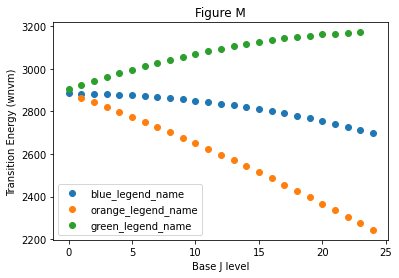

In [17]:
plt.clf()
plt.scatter(jnp.arange(J_max), levels[1,:] - levels[0,:])
plt.scatter(jnp.arange(1, J_max), p_transitions)
plt.scatter(jnp.arange(J_max -1), r_transitions)
plt.legend(['blue_legend_name',
            'orange_legend_name',
            'green_legend_name'])
plt.xlabel('Base J level')
plt.ylabel('Transition Energy (wnvm)')
plt.title('Figure M')
plt.show()

### Description of Generated Spectrum
A spectrum will be generated as a sum of gaussians centered at each transition wavelength, with relative heights of the boltzmann weight of their base level.
$$
f(λ) = W_b e^\frac{-(λ - λ_0)^2}{2\sigma^2}
$$
With σ as an empirical bandwidth parameter.

In [18]:
#Define a Gaussian
Gaussian = lambda x, a, b, c : a*jnp.exp(-1*(x-b)**2 / (2*c**2))

In [19]:
#Define Coefficients Wb
r_coeffs = normalized_boltzmann_pop[0,:-1] # Values of base levels where dJ += 1 is possible
p_coeffs = normalized_boltzmann_pop[0,1:] # Values of base levels where dJ -= 1 is possible

In [20]:
r_transitions, r_coeffs

(Array([2904.625 , 2924.2607, 2943.2559, 2961.5981, 2979.2756, 2996.2744,
        3012.5828, 3028.187 , 3043.075 , 3057.2336, 3070.6501, 3083.3123,
        3095.2065, 3106.3203, 3116.641 , 3126.1562, 3134.8525, 3142.7178,
        3149.7388, 3155.9023, 3161.1973, 3165.609 , 3169.126 , 3171.734 ],      dtype=float32),
 Array([4.91375849e-02, 1.33368179e-01, 1.81954086e-01, 1.88689351e-01,
        1.62639633e-01, 1.20640844e-01, 7.83570930e-02, 4.50126640e-02,
        2.30177753e-02, 1.05247516e-02, 4.31754207e-03, 1.59324997e-03,
        5.30036632e-04, 1.59268471e-04, 4.33014065e-05, 1.06687257e-05,
        2.38571783e-06, 4.84910174e-07, 8.97155559e-08, 1.51309987e-08,
        2.32965491e-09, 3.27931460e-10, 4.22661593e-11, 4.99557730e-12],      dtype=float32))

In [21]:
p_transitions, p_coeffs

(Array([2863.4863, 2842.0078, 2819.941 , 2797.2976, 2774.0908, 2750.3342,
        2726.039 , 2701.2195, 2675.8875, 2650.056 , 2623.738 , 2596.9458,
        2569.6924, 2541.9907, 2513.8535, 2485.293 , 2456.3228, 2426.955 ,
        2397.2026, 2367.0786, 2336.5952, 2305.7666, 2274.603 , 2243.1196],      dtype=float32),
 Array([1.33368179e-01, 1.81954086e-01, 1.88689351e-01, 1.62639633e-01,
        1.20640844e-01, 7.83570930e-02, 4.50126640e-02, 2.30177753e-02,
        1.05247516e-02, 4.31754207e-03, 1.59324997e-03, 5.30036632e-04,
        1.59268471e-04, 4.33014065e-05, 1.06687257e-05, 2.38571783e-06,
        4.84910174e-07, 8.97155559e-08, 1.51309987e-08, 2.32965491e-09,
        3.27931460e-10, 4.22661593e-11, 4.99557730e-12, 5.42312614e-13],      dtype=float32))

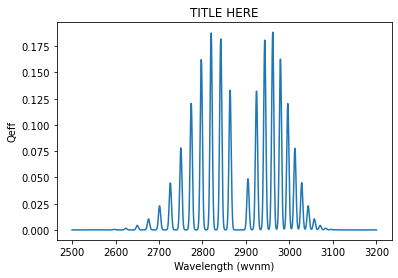

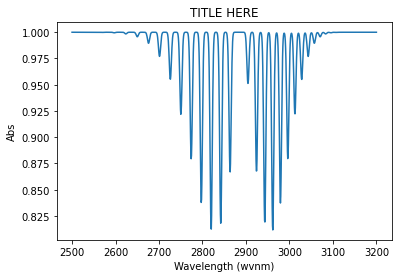

In [22]:
domain = jnp.linspace(2500,3200,1000)
sigma = 2.5

r_excitation_data = jnp.array([[Gaussian(domain, W_b, l_c, sigma) for W_b in r_coeffs] for l_c in r_transitions])
p_excitation_data = jnp.array([[Gaussian(domain, W_b, l_c, sigma) for W_b in p_coeffs] for l_c in p_transitions])

excitation_data = []
for i in range(r_excitation_data.shape[0]):
  excitation_data.append(r_excitation_data[i,i,:])
  excitation_data.append(p_excitation_data[i,i,:])
excitation_data = jnp.array(excitation_data)

plot_data('TITLE HERE', domain, excitation_data.sum(0), 'Wavelength (wvnm)', 'Qeff')
plot_data('TITLE HERE', domain, 1 - excitation_data.sum(0), 'Wavelength (wvnm)', 'Abs')

## Graph Real Data

In [23]:
#Obtain jcampdx from NIST, a common IR file format at
# https://webbook.nist.gov/cgi/cbook.cgi?JCAMP=C7647010&Index=0&Type=IR
# Save it to your google drive and point to it here
from IPython.testing import test
from google.colab import drive
drive.mount('/content/drive')
##################################################################
hcl_jcamp = '/content/drive/MyDrive/7647-01-0-IR.jdx'
#%cat $hcl_jcamp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
def get_jcamp_data(jcamp_fn):
  with open(jcamp_fn, 'r') as w:
    lines = [line[:-1] if line.endswith('\n') else line for line in w.readlines()]
  #print(lines)
  data_start = lines.index("##XYDATA=(X++(Y..Y))") + 1
  data_end = lines.index("##END=")
  #Data is averaged some number of times
  data_lines = lines[data_start:data_end]
  data = jnp.array([[float(element) for element in line.split(' ')] for line in data_lines])
  x_data = data[:,0]
  y_data = jnp.average(data[:,1:],1)
  return x_data, y_data

plt.clf()
#Now you plot data from NIST below this comment

plt.show()

<Figure size 432x288 with 0 Axes>

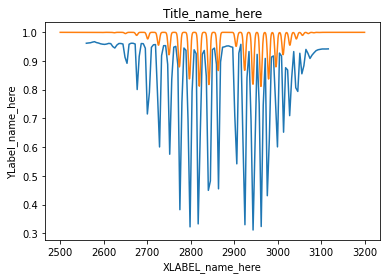

In [25]:
plt.clf()
#Now complete the plot of the data from NIST
xs, ys = get_jcamp_data(hcl_jcamp)
plt.plot(xs[450:570], ys[450:570])
plt.plot(jnp.linspace(2500,3200,1000), 1 - excitation_data.sum(0))
plt.title('Title_name_here')
plt.xlabel('XLABEL_name_here')
plt.ylabel('YLabel_name_here')
plt.show()

## Questions

### Edit this text cell to write your answers to the following questions below each question.

#### Explain the purpose of prefixes like jnp. and cons.

#### Explain the meaning/contribution of each term in the equation for T (from equation 4).

#### How does the boltzmann population differ between rotational and vibrational energy levels?  Are either well dispersed/isolated?

#### How do we know if we are using enough boltzmann levels to describe the molecular energy landscape?

#### Describe the selection rules for spectroscopy and the R and P branches.  Which is higher energy?  Why is there a "forbidden transition" between the two branches?

#### This is, principally, a single molecule analysis.  What effects or interactions that we have not described here can occur to a molecule present in a bulk/ensemble?

#### Describe and explain Figure M.

#### How well does this analysis fit/mimick real spectroscopic data?

#### At what pressure of HCl was your spectrum from the NIST link taken?  What parameters were used in cell 8 of this notebook?

#### What (in your opinion) was the best assumption made in this analysis?

#### What (in your opinion) was the worst assumption made in this analysis?


## Assignment

#### Choose a Diatomic Molecule and replicate this analysis
#### No two students may use the same molecule.  Post which molecule you will analyze to the discussion on blackboard.

In [26]:
#Shape of output = (nu_e, chi_e, B_e, D_e, a_e, gaussian_sigma, normalizing_factor, vertical_shift)
nu_max = 2
J_max = 50
low_bound = 2500
high_bound = 3200

domain, experiment_data = get_jcamp_data(hcl_jcamp)
low_ind, high_ind = jnp.where(domain>2500)[0][0], jnp.where(domain<3200)[0][-1]
domain = domain[low_ind:high_ind]
experiment_data = experiment_data[low_ind:high_ind]
domain.shape, experiment_data.shape

((148,), (148,))

In [27]:
import jax
from jax.example_libraries import stax
from jax import random
from jax.example_libraries.stax import (BatchNorm, Conv, Dense, Flatten, Relu, LogSoftmax)
from jax.example_libraries import optimizers
from jax import jit, value_and_grad
from tqdm.notebook import tqdm

def generate_spectrum_from_nn_params(output):
    
    levels = jnp.array([[T_levels(i, j, *output[:5]) for j in jnp.arange(J_max)] for i in jnp.arange(nu_max)])
    boltzmann_pop = jnp.array(boltzmann_prob(levels*cons.h*cons.c*100, temp) * rot_degeneracy(jnp.arange(levels.shape[1])))
    normalized_boltzmann_pop = boltzmann_pop/jnp.sum(boltzmann_pop)
    
    r_transitions = levels[1,1:] - levels[0,:-1]
    p_transitions = levels[1,:-1] - levels[0,1:]
    r_coeffs = normalized_boltzmann_pop[0,:-1]
    p_coeffs = normalized_boltzmann_pop[0,1:]
    r_excitation_data = jnp.array([[Gaussian(domain, W_b, l_c, output[5]) for W_b in r_coeffs] for l_c in r_transitions])
    p_excitation_data = jnp.array([[Gaussian(domain, W_b, l_c, output[5]) for W_b in p_coeffs] for l_c in p_transitions])
    
    excitation_data = []
    for i in range(r_excitation_data.shape[0]):
      excitation_data.append(r_excitation_data[i,i,:])
      excitation_data.append(p_excitation_data[i,i,:])
    excitation_data = (1 - jnp.array(excitation_data).sum(0) * output[6]) 
    return excitation_data + output[7]

def loss_fun(params, a): #mean squared difference between array a and b
    y = generate_spectrum_from_nn_params(apply_fun(params, a))
    return jnp.mean((y - a)**2)

In [ ]:
init_fun, apply_fun = stax.serial(Dense(10), Relu, Dense(7))

key = random.PRNGKey(2)
_, params = init_fun(key, input_shape=(experiment_data.shape))

step_size = 1e-3
opt_init, opt_update, get_params = optimizers.adam(step_size)
opt_state = opt_init(params)

@jit
def update(params, x, opt_state):
    """ Compute the gradient for a batch and update the parameters """
    
    # Take the gradient and evaluate the loss function
    #print(loss_fun)
    grads = jax.grad(loss_fun)(params, x)
    
    # Update the network using the gradient taken
    opt_state = opt_update(0, grads, opt_state)
    
    return get_params(opt_state), opt_state

num_epochs = 100
loss_val = jnp.zeros((num_epochs))

#print(apply_fun(params, experiment_data))
for epoch in tqdm(range(num_epochs)):
     params, opt_state, _ = update(params, experiment_data, opt_state)
     loss_val[epoch] = loss_fun(params, experiment_data)

  0%|          | 0/100 [00:00<?, ?it/s]